Title: "Linear Algebra for Machine Learning: Part 1 -Vectors"

## Introduction
* Linear algebra serves as the foundation for many machine learning algorithms and techniques.
* Linear Algebra is the branch of mathematics that studies vector spaces and linear transformations between vector spaces, such as rotating a shape, scaling it up or down, translating it (i.e. moving it), etc.
* In this blog post, we will try to understand vectors from their base representation, their properties and the various operations we can perform on vectors.

## Vectors:
   - Vectors are used in machine learning to represent features, observations, and data points.
   - For example, let's consider a simple machine learning problem of classifying flowers based on their petal length and width. We can represent each flower as a feature vector, where the length and width of the petal are the features. A flower observation could be represented as a 2-dimensional vector, such as [1.5, 0.8], where the first element represents the petal length and the second element represents the petal width.
   - vectors are not limited to representing individual data points in machine learning. They are also used to represent parameters, weights, gradients, and other entities within machine learning models. These vectors allow for efficient computations and transformations, enabling learning and inference processes.



### 1. Representation
* vector can be represented simply by a regular python list of numbers
Sure! Here are some examples of vector representation in Python using different libraries:

1. Lists:
```python
vector = [1, 2, 3]  # Represents a 3-dimensional vector [1, 2, 3]
```

2. NumPy arrays:

It is much better to use NumPy's ndarray, which provides a lot of convenient and optimized implementations of essential mathematical operations on vectors

In [102]:
import numpy as np
vector = np.array([1, 2, 3])  # Represents a 3-dimensional vector [1, 2, 3]

size of a vector

In [103]:
vector.size

3

 $i^{th}$ element (also called *entry* or *item*) of a vector $\textbf{v}$ is noted $\textbf{v}_i$.
 Example: $\textbf{v}_3$:

In [104]:
vector[2] #3rd element

3

### 2. Plotting 2D vectors

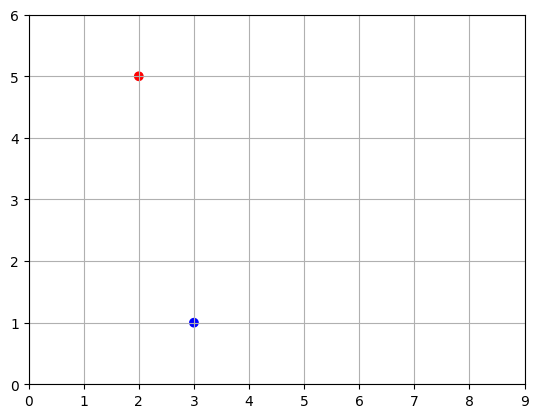

In [105]:
import matplotlib.pyplot as plt
# creates two NumPy 2D arrays
u = np.array([2, 5])
v = np.array([3, 1])
x_coords, y_coords = zip(u, v)
# Unpacks the x-coordinates of u and v into x_coords and the y-coordinates into y_coords, resulting in two tuples:
# x_coords = (2, 3): Contains the x-coordinates of u and v.
# y_coords = (5, 1): Contains the y-coordinates of u and v.

plt.scatter(x_coords, y_coords, color=["r","b"])
plt.axis([0, 9, 0, 6]) #Sets the limits of the x-axis [0,9] and y-axis [0,6] for a plot
plt.grid()
plt.show()

Vectors can also be represented as arrows.

In [106]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
   # Use plt.arrow to plot a 2D vector
    return plt.arrow(
        origin[0], origin[1],         # Start point coordinates (origin)
        vector2d[0], vector2d[1],     # Vector components
        head_width=0.2,               # Width of the arrowhead
        head_length=0.3,              # Length of the arrowhead
        length_includes_head=True,    # Include the arrowhead in the total length
        **options                     # Additional customization options
    )


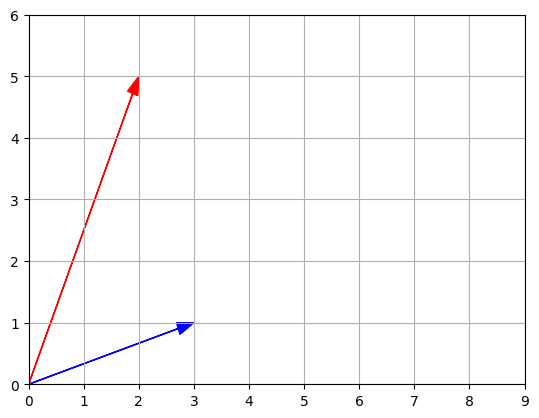

In [107]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6]) #Sets the limits of the x-axis [0,9] and y-axis [0,6] for a plot
plt.grid()
plt.show()

### 3. Plotting 3D vectors

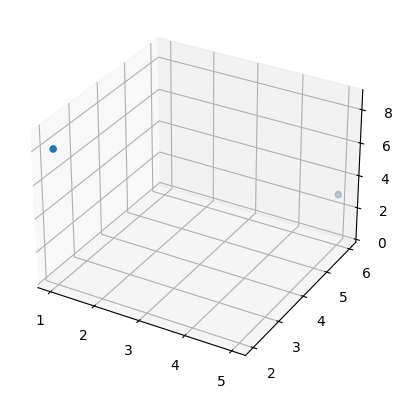

In [108]:
a = np.array([1, 2, 8])
b = np.array([5, 6, 3])
subplot3d = plt.subplot(111, projection='3d')
#Creates a subplot with a 3D projection.
# 111 specifies the grid parameters for the subplot. Here, it indicates a single subplot in a 1x1 grid.
# projection='3d' sets the projection of the subplot to 3D, enabling three-dimensional plotting.

x_coords, y_coords, z_coords = zip(a,b)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0, 9])
# subplot3d: Represents the 3D subplot created using plt.subplot(111, projection='3d').
# set_zlim3d([0, 9]): Sets the minimum and maximum values for the z-axis.
# 0 and 9 represent the minimum and maximum values for the z-axis, respectively.
plt.show()

Using custom functions to plot 3D vectors

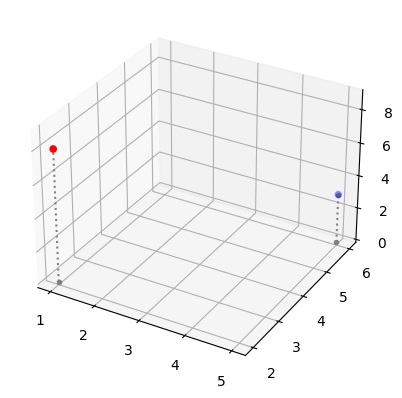

In [109]:
def plot_vectors3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x,x], [y,y], [z0, z], color="gray", linestyle='dotted', marker=".")
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)

subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_zlim([0, 9])
plot_vectors3d(subplot3d, [a,b], 0, color=("r","b"))
plt.show()

### 4. Norm
* The norm of a vector $\textbf{u}$, noted $\left \Vert \textbf{u} \right \|$, is a measure of the length (a.k.a. the magnitude) of $\textbf{u}$.
* There are multiple possible norms, but the most common one (and the only one we will discuss here) is the Euclidian norm, which is defined as:
$\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$
* That's the square root of the sum of all the squares of the components of $\textbf{u}$. We could implement this easily in pure python, recalling that $\sqrt x = x^{\frac{1}{2}}$

In [110]:
def vector_norm(vector):
    squares = [element**2 for element in vector]
    return sum(squares)**0.5

print("||", u, "|| =")
print("sqrt(",u[0],"x",u[0], " + ",u[1],"x",u[1],")=")
vector_norm(u)

|| [2 5] || =
sqrt( 2 x 2  +  5 x 5 )=


5.385164807134504

However, it is much more efficient to use NumPy's `norm` function, available in the `linalg` (**Lin**ear **Alg**ebra) module:

In [111]:
import numpy.linalg as LA

LA.norm(u)

5.385164807134504

Let's plot a little diagram to confirm that the length of vector $\textbf{u}$ is indeed $\approx5.4$:

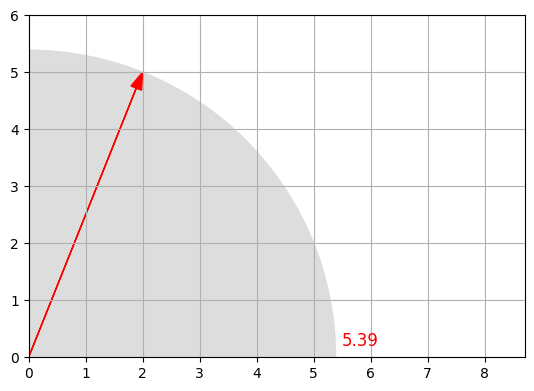

In [112]:
#Computes the magnitude of vector u using the LA.norm() function from NumPy's Linear Algebra module.
radius = LA.norm(u)
#Adds a circle to the plot with the origin (0, 0) as the center and the computed radius.
# The circle is colored with the hexadecimal color code "#DDDDDD" (a shade of gray).
plt.gca().add_artist(plt.Circle((0,0), radius, color="#DDDDDD"))
plot_vector2d(u, color="red")
plt.axis([0, 8.7, 0, 6])
plt.text(radius+0.1, 0.2, round(radius,2), color="r", fontsize=12)
#Sets the aspect ratio of the plot to be equal, ensuring that the scale is consistent in both x and y directions.
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

### 4. Addition
* Vectors of same size can be added together.
* Addition is performed elementwise:

In [113]:
print(" ", u)
print("+", v)
print("-"*10)
u + v


  [2 5]
+ [3 1]
----------


array([5, 6])

Look at what vector addition looks like graphically:

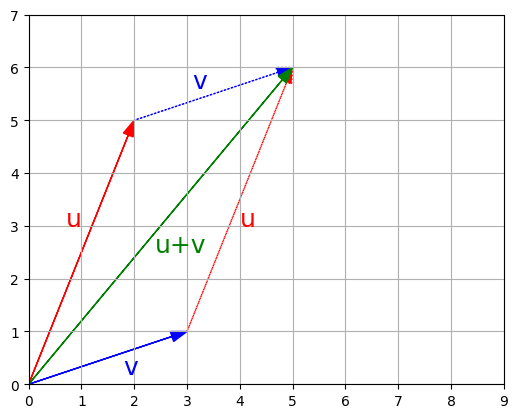

In [114]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plot_vector2d(v, origin=u, color="b", linestyle="dotted")
plot_vector2d(u, origin=v, color="r", linestyle="dotted")
plot_vector2d(u+v, color="g")
plt.axis([0, 9, 0, 7])
plt.gca().set_aspect("equal")
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)
plt.grid()
plt.show()


#### Properties
* Vector addition is **commutative**, meaning that $\textbf{u} + \textbf{v} = \textbf{v} + \textbf{u}$.
* You can see it on the previous image: following $\textbf{u}$ *then* $\textbf{v}$ leads to the same point as following $\textbf{v}$ *then* $\textbf{u}$.
* Vector addition is also **associative**, meaning that $\textbf{u} + (\textbf{v} + \textbf{w}) = (\textbf{u} + \textbf{v}) + \textbf{w}$.

If you have a shape defined by a number of points (vectors), and you add a vector $\textbf{v}$ to all of these points, then the whole shape gets shifted by $\textbf{v}$.
* This is called a [geometric translation](https://en.wikipedia.org/wiki/Translation_%28geometry%29):

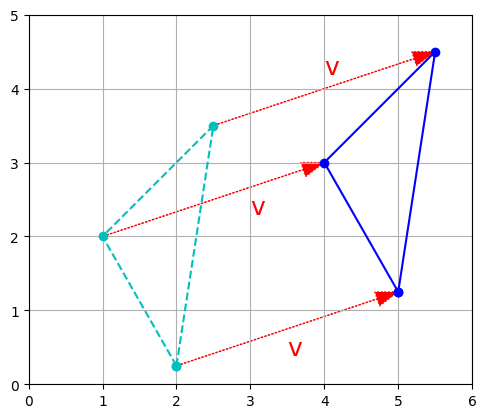

In [115]:
t1 = np.array([2, 0.25])
t2 = np.array([2.5, 3.5])
t3 = np.array([1, 2])

x_coords, y_coords = zip(t1, t2, t3, t1)
plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(v, t1, color="r", linestyle=":")
plot_vector2d(v, t2, color="r", linestyle=":")
plot_vector2d(v, t3, color="r", linestyle=":")

t1b = t1 + v
t2b = t2 + v
t3b = t3 + v

x_coords_b, y_coords_b = zip(t1b, t2b, t3b, t1b)
plt.plot(x_coords_b, y_coords_b, "b-", x_coords_b, y_coords_b, "bo")

plt.text(4, 4.2, "v", color="r", fontsize=18)
plt.text(3, 2.3, "v", color="r", fontsize=18)
plt.text(3.5, 0.4, "v", color="r", fontsize=18)

plt.axis([0, 6, 0, 5])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

Finally, subtracting a vector is like adding the opposite vector.

### 5. Multiplication by a scalar
* Vectors can be multiplied by scalars.
* All elements in the vector are multiplied by that number, for example:

In [116]:
print("1.5 *", u, "=")
1.5 * u

1.5 * [2 5] =


array([3. , 7.5])

* Graphically, scalar multiplication results in changing the scale of a figure, hence the name *scalar*.
* The distance from the origin (the point at coordinates equal to zero) is also multiplied by the scalar.
* For example, let's scale up by a factor of `k = 2.5`:

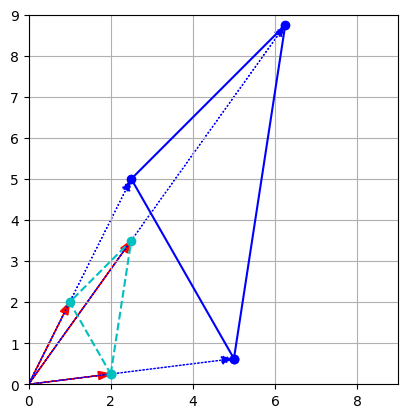

In [117]:
k = 2.5
t1c = k * t1
t2c = k * t2
t3c = k * t3

plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(t1, color="r")
plot_vector2d(t2, color="r")
plot_vector2d(t3, color="r")

x_coords_c, y_coords_c = zip(t1c, t2c, t3c, t1c)
plt.plot(x_coords_c, y_coords_c, "b-", x_coords_c, y_coords_c, "bo")

plot_vector2d(k * t1, color="b", linestyle=":")
plot_vector2d(k * t2, color="b", linestyle=":")
plot_vector2d(k * t3, color="b", linestyle=":")

plt.axis([0, 9, 0, 9])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

* Dividing a vector by a scalar is equivalent to multiplying by its multiplicative inverse (reciprocal):
$\dfrac{\textbf{u}}{\lambda} = \dfrac{1}{\lambda} \times \textbf{u}$

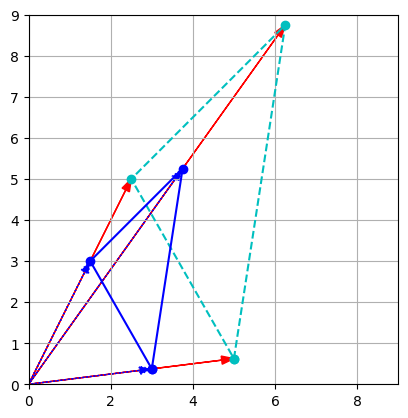

In [118]:
k = 0.6
t1d = k * t1c
t2d = k * t2c
t3d = k * t3c

x_coords, y_coords = zip(t1c, t2c, t3c, t1c)
plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(t1c, color="r")
plot_vector2d(t2c, color="r")
plot_vector2d(t3c, color="r")

x_coords_d, y_coords_d = zip(t1d, t2d, t3d, t1d)
plt.plot(x_coords_d, y_coords_d, "b-", x_coords_d, y_coords_d, "bo")

plot_vector2d(t1d, color="b", linestyle=":")
plot_vector2d(t2d, color="b", linestyle=":")
plot_vector2d(t3d, color="b", linestyle=":")

plt.axis([0, 9, 0, 9])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

#### Properties
* Scalar multiplication is **commutative**: $\lambda \times \textbf{u} = \textbf{u} \times \lambda$.
* It is also **associative**: $\lambda_1 \times (\lambda_2 \times \textbf{u}) = (\lambda_1 \times \lambda_2) \times \textbf{u}$.
* Finally, it is **distributive** over addition of vectors: $\lambda \times (\textbf{u} + \textbf{v}) = \lambda \times \textbf{u} + \lambda \times \textbf{v}$.

### 6. Zero, unit and normalized vectors
* A **zero-vector** is a vector full of 0s. Eg: (0,0) - basically the origin in a Cartesian coordinate system
* A **unit vector** is a vector with a norm equal to 1.
* The **normalized vector** of a non-null vector $\textbf{v}$, noted $\hat{\textbf{v}}$, is the unit vector that points in the same direction as $\textbf{v}$.
* It is equal to: $\hat{\textbf{v}} = \dfrac{\textbf{v}}{\left \Vert \textbf{v} \right \|}$



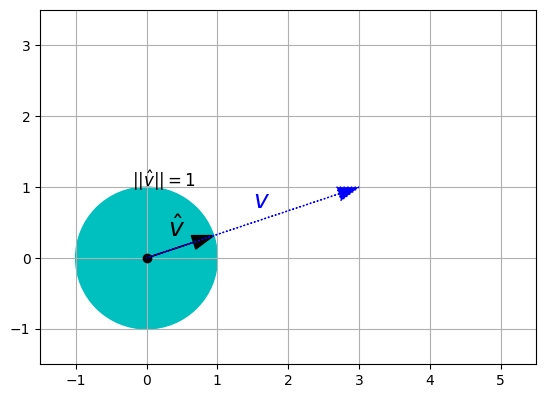

In [119]:
# Add a circle centered at (0, 0) with radius 1 and color 'c'
plt.gca().add_artist(plt.Circle((0, 0), 1, color='c'))

# Plot a black dot at the origin (0, 0) - "k" is short for black. - "o" marker style represents a circular marker.
plt.plot(0, 0, "ko")

# Plot the normalized vector v / ||v|| as a black solid line with zorder 10
# zorder value is a numerical value, where higher values indicate that the element should be drawn on top of elements with lower values.
plot_vector2d(v / LA.norm(v), color="k", zorder=10)

# Plot the vector v as a blue dashed line with zorder 15
plot_vector2d(v, color="b", linestyle=":", zorder=15)

# Add the text label for the normalized vector at position (0.3, 0.3) with black color and fontsize 18
plt.text(0.3, 0.3, r"$\hat{v}$", color="k", fontsize=18)

# Add the text label for the normalized vector at position (0.3, 0.3) with black color and fontsize 18
plt.text(-0.2, 1, r"$||\hat{v}||=1$", color="k", fontsize=12)

# Add the text label for the vector v at position (1.5, 0.7) with blue color and fontsize 18
plt.text(1.5, 0.7, "$v$", color="b", fontsize=18)

# Set the axis limits
plt.axis([-1.5, 5.5, -1.5, 3.5])
# Set the aspect ratio of the plot to be equal
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

### 7. Dot Product
* Also called *scalar product* or *inner product* in the context of the Euclidian space.
* The dot product is a mathematical operation defined between two vectors that results in a scalar (a single number). (and that is why it is called as scalar product)
* dot product of two vectors $\textbf{u}$ and $\textbf{v}$ is denoted $\textbf{u} \cdot \textbf{v}$, or sometimes $⟨\textbf{u}|\textbf{v}⟩$ or $(\textbf{u}|\textbf{v})$, and it is defined as:  
  $\textbf{u} \cdot \textbf{v} = \left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \| \times cos(\theta)$  
  where $\theta$ is the angle between $\textbf{u}$ and $\textbf{v}$.

Geometric Intuition:
* The dot product measures the degree of alignment or similarity between two vectors.
* Geometrically, it calculates the projection of one vector onto another and then multiplies the magnitudes of the two vectors.
* The resulting scalar value indicates how much the two vectors point in the same direction. (aka the magnitude or norm of the resulting projection).

To better understand this equation, \\
* 𝜃 = 0° => cos(𝜃) = 1.0 \\
* 𝜃 = 90° => cos(𝜃) = 0.0 \\
* 𝜃 = 180° => cos(𝜃) = -1.0 \\
* 𝜃 = 270° => cos(𝜃) = 0.0 \\
* 𝜃 = 360° => cos(𝜃) = 1.0 \\

i.e., cos(𝜃) is max when same direction, \\
cos(𝜃) is min when opposite direction \\
cos(𝜃) is 0 when perpendicular direction,


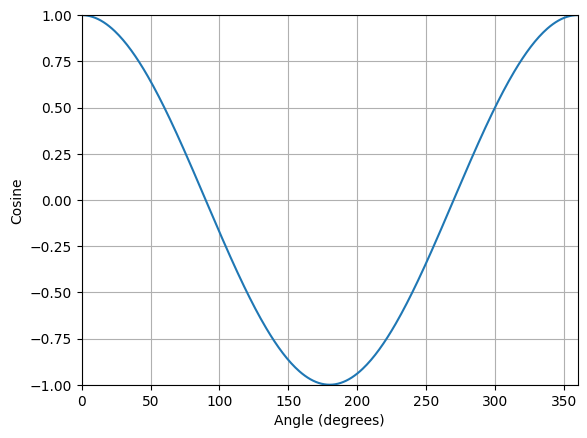

In [120]:
# Generate angles from 0 to 360 degrees in increments of 1 degree
angles = np.arange(0, 361, 1)

# Calculate cosine values for each angle
cos_values = np.cos(np.radians(angles))

# Plot the cosine values
plt.plot(angles, cos_values)

# Set plot limits and labels
plt.xlim(0, 360)
plt.ylim(-1, 1)
plt.xlabel('Angle (degrees)')
plt.ylabel('Cosine')

# Add a gridline
plt.grid(True)

# Show the plot
plt.show()

In [121]:
def plot_geometric_dot_product2D(u,v):
  #calc dot product
  dot_product = u.dot(v)
  #draw circle to indicate dot product magnitude
  plt.gca().add_artist(plt.Circle((0,0), dot_product, color="#DDDDDD"))
  #plot u and v
  plot_vector2d(u, color="r")
  plot_vector2d(v, color="b")

  # Calculate the magnitude of u and v
  magnitude_u = np.linalg.norm(u)
  magnitude_v = np.linalg.norm(v)

  # Calculate the projection of u onto v
  projection = dot_product / magnitude_v
  projected_vector = projection * v

  # Plot the vectors u, v, and the projected vector
  plot_vector2d(projected_vector, color='green', linestyle='dashed')

  #calculate the nearest whole number
  max_axis = int(dot_product + 2)


  plt.axis([0, max_axis, 0, max_axis]) #Sets the limits of the x-axis [0,9] and y-axis [0,6] for a plot
  plt.gca().set_aspect("equal")
  plt.grid()
  plt.show()

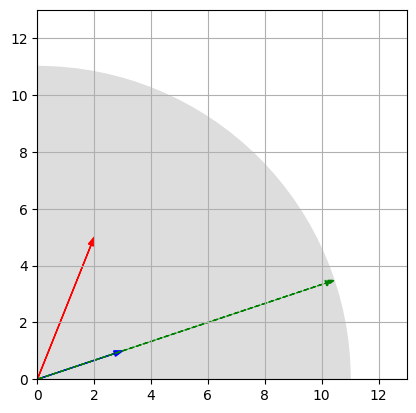

In [122]:
plot_geometric_dot_product2D(u,v)

* Another way to calculate the dot product is:  
  $\textbf{u} \cdot \textbf{v} = \sum_i{\textbf{u}_i \times \textbf{v}_i}$

Algebraic Intuition:
* This equation represents the algebraic definition of the dot product.
* It states that the dot product of two vectors, 𝐮 and 𝐯, is equal to the sum of the products of their corresponding components.

In [123]:
# Calculate the dot product manually
dot_product = (u[0]*v[0]) + (u[1]*v[1])

# Print the result
print(dot_product)

11


More efficient implementation:
* is provided by NumPy with the `np.dot()` function:

In [124]:
np.dot(u, v)

11

Equivalently, you can use the `dot` method of `ndarray`s:

In [125]:
u.dot(v)

11

**Caution**: the `*` operator will perform an *elementwise* multiplication, *NOT* a dot product:

In [126]:
print("  ",u)
print("* ",v, "(NOT a dot product)")
print("-"*10)

u * v

   [2 5]
*  [3 1] (NOT a dot product)
----------


array([6, 5])

#### Properties
* The dot product is **commutative**: $\textbf{u} \cdot \textbf{v} = \textbf{v} \cdot \textbf{u}$.  
(projecting u onto v or v onto u is same.)
* The dot product is only defined between two vectors, not between a scalar and a vector. This means that we cannot chain dot products: for example, the expression $\textbf{u} \cdot \textbf{v} \cdot \textbf{w}$ is not defined since $\textbf{u} \cdot \textbf{v}$ is a scalar and $\textbf{w}$ is a vector.
* This also means that the dot product is **NOT associative**: $(\textbf{u} \cdot \textbf{v}) \cdot \textbf{w} ≠ \textbf{u} \cdot (\textbf{v} \cdot \textbf{w})$ since neither are defined.
* However, the dot product is **associative with regards to scalar multiplication**: $\lambda \times (\textbf{u} \cdot \textbf{v}) = (\lambda \times \textbf{u}) \cdot \textbf{v} = \textbf{u} \cdot (\lambda \times \textbf{v})$
* Finally, the dot product is **distributive** over addition of vectors: $\textbf{u} \cdot (\textbf{v} + \textbf{w}) = \textbf{u} \cdot \textbf{v} + \textbf{u} \cdot \textbf{w}$.

### 8. Angle between vectors
One of the many uses of the dot product is to calculate the angle between two non-zero vectors. Looking at the dot product definition, we can deduce the following formula:

$\theta = \arccos{\left ( \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \|} \right ) }$

Note that if $\textbf{u} \cdot \textbf{v} = 0$, it follows that $\theta = \dfrac{π}{2}$ (aka 180/2 = 90deg). In other words, if the dot product of two non-null vectors is zero, it means that they are orthogonal (90deg apart).

Note:
* The cos() function calculates the cosine of an angle.
* It takes an angle (in radians) as input and returns the corresponding cosine value between -1 and 1.
* The arccos() function, also known as the inverse cosine function or arc cosine function, is the inverse operation of the cosine function.
* It takes a value between -1 and 1 as input and returns the corresponding angle (in radians) whose cosine is the input value.

Let's use this formula to calculate the angle between $\textbf{u}$ and $\textbf{v}$ (in radians):

In [127]:
def vector_angle(u, v):
    cos_theta = u.dot(v) / LA.norm(u) / LA.norm(v)
    return np.arccos(cos_theta.clip(-1, 1))

theta = vector_angle(u, v)
print("Angle =", theta, "radians")
print("      =", theta * 180 / np.pi, "degrees")

Angle = 0.8685393952858895 radians
      = 49.76364169072618 degrees


Note: due to small floating point errors, `cos_theta` may be very slightly outside the $[-1, 1]$ interval, which would make `arccos` fail. This is why we clipped the value within the range, using NumPy's `clip` function.

### 9. Projecting a point onto an axis
The dot product is also very useful to project points onto an axis. The projection of vector $\textbf{v}$ onto $\textbf{u}$'s axis is given by this formula:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| ^2} \times \textbf{u}$

Which is equivalent to:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = (\textbf{v} \cdot \hat{\textbf{u}}) \times \hat{\textbf{u}}$

* The formula calculates the dot product of 𝐯 and 𝐮̂, which is a scalar (aka magnitude) that gives the component of 𝐯 vector in the direction of 𝐮̂.
* This value is then multiplied by 𝐮̂, which gives the scalar value from previous point, a vector projection (aka direction) onto the axis defined by 𝐮.



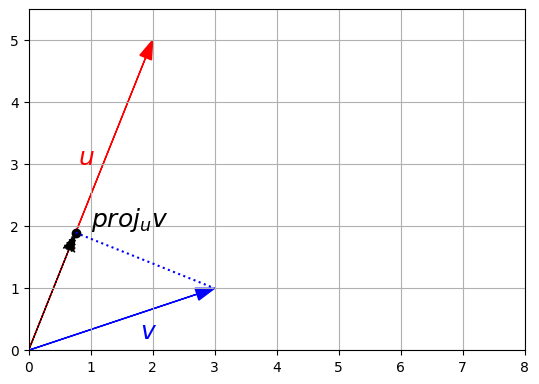

In [128]:
u_normalized = u / LA.norm(u)
proj = v.dot(u_normalized) * u_normalized

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")

plot_vector2d(proj, color="k", linestyle=":")
plt.plot(proj[0], proj[1], "ko")

plt.plot([proj[0], v[0]], [proj[1], v[1]], "b:")

plt.text(1, 2, "$proj_u v$", color="k", fontsize=18)
plt.text(1.8, 0.2, "$v$", color="b", fontsize=18)
plt.text(0.8, 3, "$u$", color="r", fontsize=18)

plt.axis([0, 8, 0, 5.5])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

As we can see in the below example, $\textbf{proj}_{\textbf{u}}{\textbf{v}}$ (projection of v on u vector) diminishes to miniscule norm (aka magnitude) value.

This is because:
* the angle between $\textbf{u}$ and $\textbf{v}$ is approaching orthogonal (90 degree) angle.
* As a result, the scalar (aka magnitude) result of the product $(\textbf{v} \cdot \hat{\textbf{u}})$ becomes miniscule since $cos(90) = 0$.
* Finally when the small magnitude from $(\textbf{v} \cdot \hat{\textbf{u}})$ is projected $\hat{\textbf{u}}$ with $(\textbf{v} \cdot \hat{\textbf{u}}) \times \hat{\textbf{u}}$, the resultant vector also ends up being tiny.

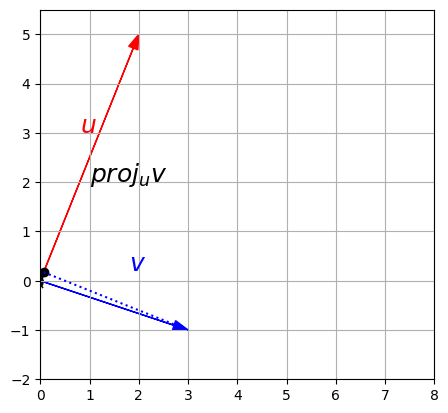

In [135]:
u = np.array([2, 5])
v = np.array([3, -1])

u_normalized = u / LA.norm(u)
proj = v.dot(u_normalized) * u_normalized

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")

plot_vector2d(proj, color="k", linestyle=":")
plt.plot(proj[0], proj[1], "ko")

plt.plot([proj[0], v[0]], [proj[1], v[1]], "b:")

plt.text(1, 2, "$proj_u v$", color="k", fontsize=18)
plt.text(1.8, 0.2, "$v$", color="b", fontsize=18)
plt.text(0.8, 3, "$u$", color="r", fontsize=18)

plt.axis([0, 8, -2, 5.5])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

## References

*   [Book: Deep Learning Book - Ian Goodfellow and Yoshua Bengio and Aaron Courville](https://www.deeplearningbook.org/)
*   Book: Hands-On Machine Learning with Scikit-Learn and TensorFlow - Aurélien Géron
* [ageron github | handson-ml3](https://github.com/ageron/handson-ml3/blob/main/math_linear_algebra.ipynb)
* [Khan Academy - Linear Algebra](https://www.khanacademy.org/math/linear-algebra)
* [Essence of linear algebra - 3Blue1Brown YouTube Series](https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&ab_channel=3Blue1Brown)

